<a href="https://colab.research.google.com/github/riyazachariah/MNIST-classification/blob/main/Handwritten_Digits_Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
# Importing TensorFlow
import tensorflow as tf

# Importin Numpy
import numpy as np

# Setting the verbosity of the logs
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print the version of TensorFlow used
print ("TensorFlow version is", tf.__version__)

TensorFlow version is 2.8.2


In [83]:
# Import the handwritten digits dataset (MNIST)
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [84]:
#Look at the dimensions of the data
print("X train shape", x_train.shape)
print("Y train shape", y_train.shape)
print("X test shape", x_test.shape)
print("Y test shape", y_test.shape)

X train shape (60000, 28, 28)
Y train shape (60000,)
X test shape (10000, 28, 28)
Y test shape (10000,)


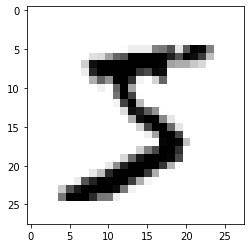

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the first 28x28 image in the training dataset
plt.imshow(x_train[0], cmap='binary')
plt.show()

In [86]:
# Check the output of the first training input
y_train[0]

5

In [87]:
# Perform one hot encoding of the outputs
y_train_ohe = tf.keras.utils.to_categorical(y_train)
y_test_ohe = tf.keras.utils.to_categorical(y_test)

In [88]:
# Check the shape of the encoded labels to make sure that the encoding worked
print("Y train shape is", y_train_ohe.shape)
print("Y test shape is", y_test_ohe.shape)

Y train shape is (60000, 10)
Y test shape is (10000, 10)


In [89]:
# checking the encoding
y_train_ohe[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [90]:
# Input layer will have 28*28 nodes
x_train_reshaped = x_train.reshape((60000,784))
x_test_reshaped = x_test.reshape((10000,784))

In [91]:
# Looking at pixel values in the first training image
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [92]:
# Normalizing the data
mean = x_train_reshaped.mean()
std = x_train_reshaped.std()
x_train_norm = (x_train_reshaped-mean)/(std+1e-10)
x_test_norm = (x_test_reshaped-mean)/(std+1e-10)

In [93]:
# Looking at normalized pixel values in the first training image
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [94]:
# Creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(128, activation = 'relu', input_shape=(784,)), Dense(128, activation = 'relu'), Dense(10, activation = 'softmax')])

In [95]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Train the model
model.fit(x_train_norm, y_train_ohe, epochs=3 )

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3781 - accuracy: 0.8886
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1886 - accuracy: 0.9442
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1439 - accuracy: 0.9578


In [97]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test_norm, y_test_ohe)


313/313 [==============================] - 1s 2ms/step - loss: 0.1355 - accuracy: 0.9601


In [98]:
print("Test accuracy", accuracy*100)

Test accuracy 96.0099995136261


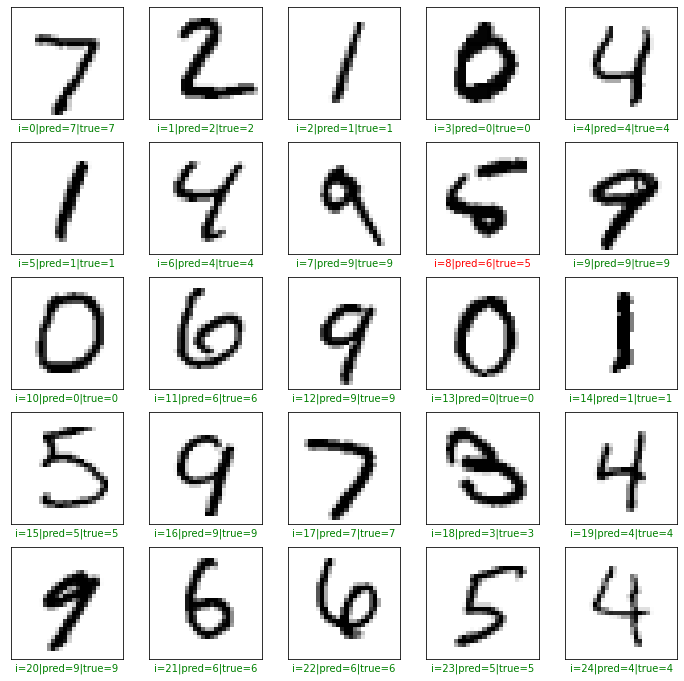

In [102]:
# Predictions (Ideally need a subset of data that has not been used for training or testing)
preds = model.predict(x_test_norm)

# Plot the predictions for the first 25 images in the test set
plt.figure(figsize = (12,12))
start_index=0

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  pred = np.argmax(preds[start_index+i])
  actual = np.argmax(y_test_ohe[start_index+i])
  col = 'g'
  if pred != actual:
    col = 'r'
  plt.xlabel('i={}|pred={}|true={}'.format(start_index+i,pred,actual),color=col)
  plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()